# 3차시: 데이터 로드 및 병합 실습
이번 차시에서는 다양한 형식의 데이터를 불러오고, 불러온 데이터를 병합하는 방법을 학습합니다.

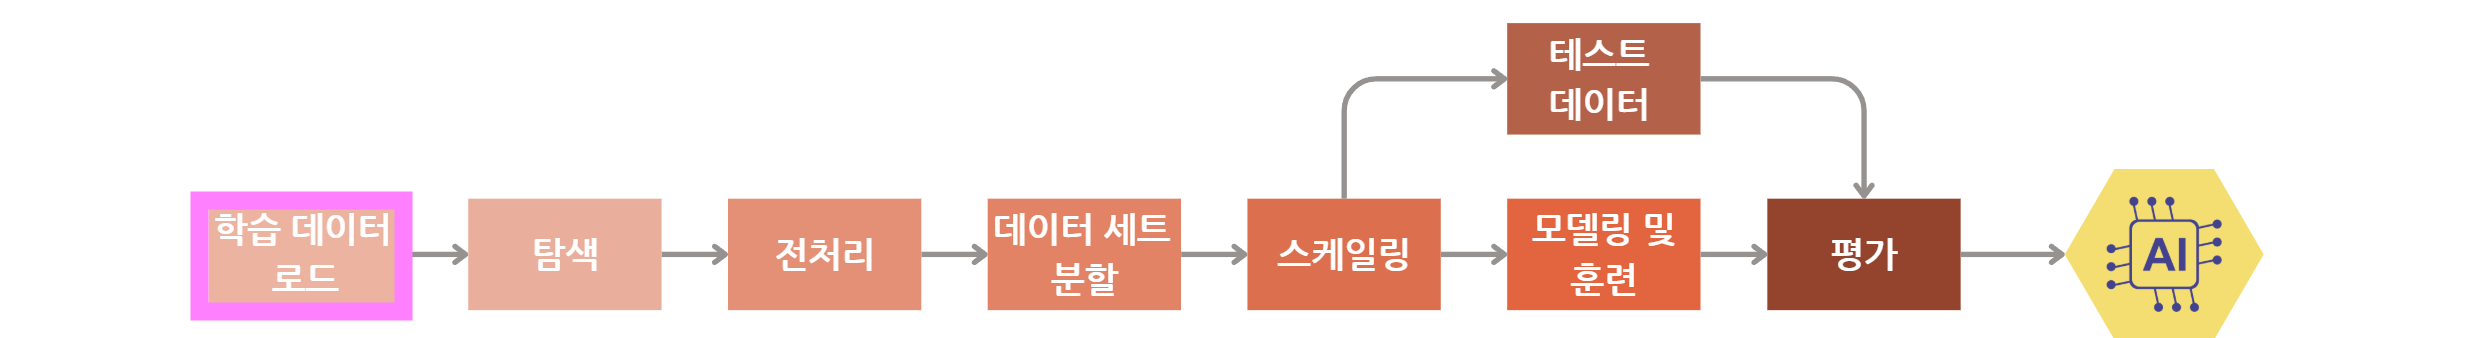

## 핵심 개념 정리

1. `read_csv()`: CSV 파일을 불러올 때 사용
2. `read_json()`: JSON 파일을 불러올 때 사용
3. `read_excel()`: Excel 파일을 불러올 때 사용
4. `concat()`: 여러 데이터를 위 또는 옆으로 이어붙일 때 사용
5. `merge()`: 공통 열(키)을 기준으로 데이터를 병합할 때 사용

## 1. 데이터 로드

In [ ]:
import pandas as pd

# CSV 파일 불러오기
df_csv = pd.read_csv("학생정보.csv")  # 파일 경로에 맞게 수정
df_csv.head() # 데이터의 처음 5행을 출력

,학생ID,이름,전공코드,학년
0,1001,김지훈,CS,2
1,1002,이서연,EE,3
2,1003,박민수,ME,1
3,1004,정하영,CS,4


In [3]:
# JSON 파일 불러오기
df_json = pd.read_json("전공정보.json")
df_json.head()

,전공코드,전공명,지도교수
0,CS,컴퓨터공학과,홍교수
1,EE,전자공학과,이교수
2,ME,기계공학과,박교수
3,KK,AI학과,손교수


In [5]:
# Excel 파일 불러오기
df_excel = pd.read_excel("수강신청정보_1.xlsx")
df_excel.head()

,학생ID,과목코드,수강학기
0,1001,C101,2024-1
1,1002,C102,2024-1


In [6]:
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_built_with_meson',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_pandas_datetime_CAPI',
 '_pandas_parser_CAPI',
 '_testing',
 '_typing',
 '_version_meson',
 'annota

## 2. 데이터 붙이기:concat

In [7]:
# concat 예시
df1 = pd.DataFrame({"name": ["Tom", "Jane"], "score": [90, 85]})
df2 = pd.DataFrame({"name": ["Mike", "Anna"], "score": [78, 92]})

In [8]:
df1

,name,score
0,Tom,90
1,Jane,85


In [9]:
df2

,name,score
0,Mike,78
1,Anna,92


In [12]:
df_concat = pd.concat([df1, df2], ignore_index=True) 
df_concat.index=(1,2,3,4)
df_concat

,name,score
1,Tom,90
2,Jane,85
3,Mike,78
4,Anna,92


## 3.데이터 병합

### 3-1.inner 조인

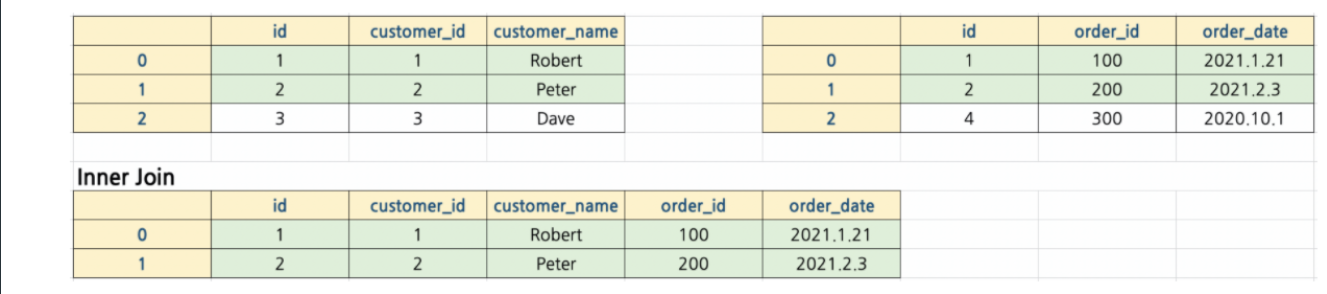

In [13]:
### 사전 선언
import pandas as pd
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'customer_id': [1, 2, 3],
    'customer_name': ['Robert', 'Peter', 'Dave']
}, columns=['id', 'customer_id', 'customer_name'])

df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'order_id': [100, 200, 300],
    'order_date': ['2021-01-21', '2021-02-03', '2020-10-01']
}, columns=['id', 'order_id', 'order_date'])

In [19]:
df1

,id,customer_id,customer_name
0,1,1,Robert
1,2,2,Peter
2,3,3,Dave


In [20]:
df2

,id,order_id,order_date
0,1,100,2021-01-21
1,2,200,2021-02-03
2,4,300,2020-10-01


In [25]:
pd.merge?

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'MergeHow' = 'inner',
    on: 'IndexLabel | AnyArrayLike | None' = None,
    left_on: 'IndexLabel | AnyArrayLike | None' = None,
    right_on: 'IndexLabel | AnyArrayLike | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool | None' = None,
    indicator: 'str | bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning:

In [14]:
pd.merge(df1, df2, on='id', how='inner') # 명시적으로 써주기 위해 how 옵션을 써줄 수도 있음

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


In [16]:
pd.merge(df1, df2, on='id', how='left') # 명시적으로 써주기 위해 how 옵션을 써줄 수도 있음

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100.0,2021-01-21
1,2,2,Peter,200.0,2021-02-03
2,3,3,Dave,NaN,NaN


In [17]:
pd.merge(df1, df2, on='id', how='right') # 명시적으로 써주기 위해 how 옵션을 써줄 수도 있음

,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,100,2021-01-21
1,2,2.0,Peter,200,2021-02-03
2,4,NaN,NaN,300,2020-10-01


In [18]:
pd.merge(df1, df2, on='id', how='outer') # 명시적으로 써주기 위해 how 옵션을 써줄 수도 있음

,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,100.0,2021-01-21
1,2,2.0,Peter,200.0,2021-02-03
2,3,3.0,Dave,NaN,NaN
3,4,NaN,NaN,300.0,2020-10-01


---

## 연습문제


### 문제 1. merge()를 활용하여 학생과 전공 정보를 병합하세요.
아래 가이드를 따라 코드를 작성하고 실행하세요.

- 대상 파일: '학생정보.csv', '전공정보.json'
- 각각 df_student, df_major라는 이름으로 불러오세요.
- 두 파일을 전공코드를 기준으로 병합하고, 병합된 결과를 df_result 변수에 저장하세요.
- 병합 방식은 왼쪽 기준 병합 (inner join) 으로 합니다.

In [26]:
# 여기에 코드를 작성하세요.
df_student=pd.read_csv('학생정보.csv')
df_major=pd.read_json('전공정보.json')

In [27]:
df_student

,학생ID,이름,전공코드,학년
0,1001,김지훈,CS,2
1,1002,이서연,EE,3
2,1003,박민수,ME,1
3,1004,정하영,CS,4


In [28]:
df_major

,전공코드,전공명,지도교수
0,CS,컴퓨터공학과,홍교수
1,EE,전자공학과,이교수
2,ME,기계공학과,박교수
3,KK,AI학과,손교수


In [30]:
df_result=pd.merge(df_student,df_major, on='전공코드', how='inner')
df_result

,학생ID,이름,전공코드,학년,전공명,지도교수
0,1001,김지훈,CS,2,컴퓨터공학과,홍교수
1,1002,이서연,EE,3,전자공학과,이교수
2,1003,박민수,ME,1,기계공학과,박교수
3,1004,정하영,CS,4,컴퓨터공학과,홍교수


### 문제 2. concat()을 사용하여 수강 데이터를 통합하세요.
아래 가이드를 따라 코드를 작성하고 실행하세요.

- 대상 파일: '수강신청정보_1.xlsx', '수강신청정보_2.xlsx'
- 두 파일은 각각 1학기와 2학기의 수강 정보를 담고 있으며, 동일한 형식입니다.
- 두 파일을 각각 df_q1, df_q2로 불러오고, 세로 방향으로 concat 하여 df_all 변수에 저장하세요.
- 인덱스는 재설정 (ignore_index=True) 하세요.

In [35]:
# 여기에 코드를 작성하세요.
df_q1=pd.read_excel('수강신청정보_1.xlsx')
df_q2=pd.read_excel('수강신청정보_2.xlsx')
df_all=pd.concat([df_q1,df_q2],ignore_index=True)
df_all

,학생ID,과목코드,수강학기
0,1001,C101,2024-1
1,1002,C102,2024-1
2,1003,C103,2024-2
3,1004,C101,2024-2


## 도전 문제

### 문제 3. merge()를 활용하여 학생과 전공 정보를 병합하세요.
아래 가이드를 따라 코드를 작성하고 실행하세요.

- pandas는 ps라는 별칭으로 로드하시오.
- '학생정보_sep.csv'를 구분자(|)를 고려해서 로드하고 df_s에 저장하세요.
- '전공정보.json'파일을 로드하여 df_m에 저장하세요.
- 두 파일을 전공코드를 기준으로 병합하고, 병합된 결과를 df_result 변수에 저장하세요.
- 병합 방식은 왼쪽 기준 병합 (outer join) 으로 합니다.


In [44]:
# 여기에 코드를 작성하세요.
import pandas as ps
df_s=ps.read_csv('학생정보_sep.csv',sep='|')
df_m=ps.read_json('전공정보.json')
df_result=ps.merge(df_s,df_m,on='전공코드',how='outer')
df_result

,학생ID,이름,전공코드,학년,전공명,지도교수
0,1001.0,김지훈,CS,2.0,컴퓨터공학과,홍교수
1,1004.0,정하영,CS,4.0,컴퓨터공학과,홍교수
2,1002.0,이서연,EE,3.0,전자공학과,이교수
3,NaN,NaN,KK,NaN,AI학과,손교수
4,1003.0,박민수,ME,1.0,기계공학과,박교수


In [41]:
df_s

,학생ID,이름,전공코드,학년
0,1001,김지훈,CS,2
1,1002,이서연,EE,3
2,1003,박민수,ME,1
3,1004,정하영,CS,4


In [42]:
df_m

,전공코드,전공명,지도교수
0,CS,컴퓨터공학과,홍교수
1,EE,전자공학과,이교수
2,ME,기계공학과,박교수
3,KK,AI학과,손교수


In [ ]:
ps.read_csv?

Signature:
ps.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '